In [2]:
import pandas as pd

val1 = [[80,69,83,98],[71,90,69,66], [74,72,72,95]]
val2 =[[68,70,84,70], [65,91,90,66], [78,94,96,64]]
val3 = [[79,99,95,90], [99,76,81,97], [95,80,62,84]]
idx1 = ["송중기", "박보검", "김나연"]
idx2 = ["권보아", "김범수", "박효신"]
idx3 = ["김유정", "홍은희", "이세영"]
col1 = ["국어", "수학", "영어", "과학"]
col2 = ["국어", "수학", "영어", "사회"]
df1 = pd.DataFrame(val1, index=idx1, columns=col1)
df2 = pd.DataFrame(val2, index=idx2, columns=col1)
df3 = pd.DataFrame([[65,82], [85,60], [75,78]], index=idx1, columns=["사회", "일어"])
df4 = df2.reindex(columns=["영어", "과학", "수학", "국어"])
df5 = pd.DataFrame(val3, index=idx3, columns=col2)

In [3]:
df1

,국어,수학,영어,과학
송중기,80,69,83,98
박보검,71,90,69,66
김나연,74,72,72,95


In [4]:
df2

,국어,수학,영어,과학
권보아,68,70,84,70
김범수,65,91,90,66
박효신,78,94,96,64


In [5]:
# join 옵션 기본값은 outer join
# axis 옵션 기본값은 0

pd.concat([df1, df2])

,국어,수학,영어,과학
송중기,80,69,83,98
박보검,71,90,69,66
김나연,74,72,72,95
권보아,68,70,84,70
김범수,65,91,90,66
박효신,78,94,96,64


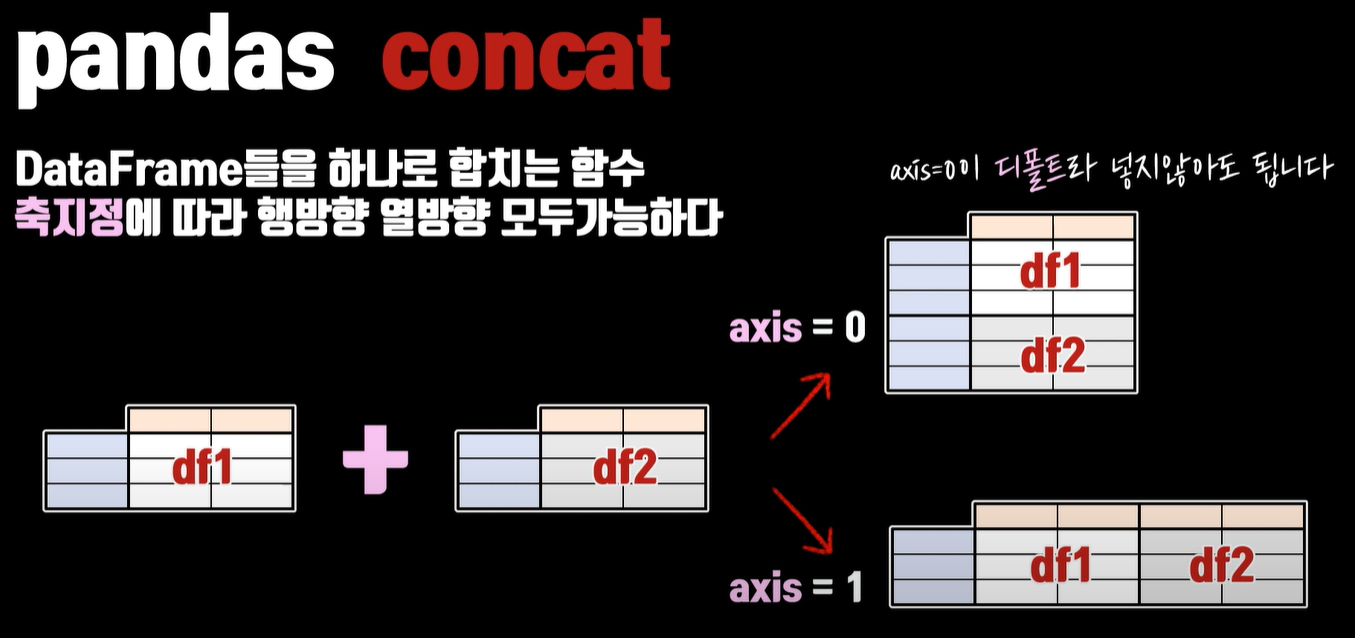

In [6]:
df3

,사회,일어
송중기,65,82
박보검,85,60
김나연,75,78


In [7]:
pd.concat([df1, df3], axis=1)

,국어,수학,영어,과학,사회,일어
송중기,80,69,83,98,65,82
박보검,71,90,69,66,85,60
김나연,74,72,72,95,75,78


In [8]:
df1 

,국어,수학,영어,과학
송중기,80,69,83,98
박보검,71,90,69,66
김나연,74,72,72,95


In [9]:
df4 
# 컬럼 순서가  df1과 다름

,영어,과학,수학,국어
권보아,84,70,70,68
김범수,90,66,91,65
박효신,96,64,94,78


In [10]:
pd.concat([df1, df4])
# 컬럼의 순서가 서로 달라도, 컬럼명이 같으면 알아서 매칭해줌

,국어,수학,영어,과학
송중기,80,69,83,98
박보검,71,90,69,66
김나연,74,72,72,95
권보아,68,70,84,70
김범수,65,91,90,66
박효신,78,94,96,64


In [11]:
df1

,국어,수학,영어,과학
송중기,80,69,83,98
박보검,71,90,69,66
김나연,74,72,72,95


In [12]:
df5

,국어,수학,영어,사회
김유정,79,99,95,90
홍은희,99,76,81,97
이세영,95,80,62,84


In [13]:
pd.concat([df1, df5], join="inner")
# inner 조인은 교집합, 컬럼이 서로 다른 건 잘라냄

,국어,수학,영어
송중기,80,69,83
박보검,71,90,69
김나연,74,72,72
김유정,79,99,95
홍은희,99,76,81
이세영,95,80,62


In [14]:
pd.concat([df1, df5], join="outer")
# outer는 합집합, 옵션 기본값이라서 지정하지 않아도 됨

,국어,수학,영어,과학,사회
송중기,80,69,83,98.0,NaN
박보검,71,90,69,66.0,NaN
김나연,74,72,72,95.0,NaN
김유정,79,99,95,NaN,90.0
홍은희,99,76,81,NaN,97.0
이세영,95,80,62,NaN,84.0


In [15]:
pd.concat([df1, df5.reindex(columns=df1.columns, fill_value="불참")])
# df1의 컬럼 기준으로 아우터조인 

,국어,수학,영어,과학
송중기,80,69,83,98
박보검,71,90,69,66
김나연,74,72,72,95
김유정,79,99,95,불참
홍은희,99,76,81,불참
이세영,95,80,62,불참
